# Analysis #1: LOTUS and OSK comparison in Holometabola and Hemimetabola groups

- Author: Leo BLONDEL

### Required inputs
- ../Data/02_Oskar_analyses/2.4/FASTA/OSKAR_holometabola.fasta
- ../Data/02_Oskar_analyses/2.4/FASTA/OSKAR_hemimetabola.fasta


### Description
Generates Holometabola alignment after bootstrapping step in order to compare it to Hemimetabola alignment. Calculates LogRatio score based on Valdar conservation measures. 
Create the plot shown in Figure 4.

In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO, AlignIO
import sys
import os
import besse_blondel_conservation_scores

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# Generate Mapping table between Alignement And Structure

In [ ]:
OskarAlignPath = "../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.fasta"
OskarAlign = SeqIO.parse(OskarAlignPath,'fasta')
OskarSeqs = [seq for seq in OskarAlign]

In [ ]:
for l in OskarSeqs:
    if 'melanogaster' in l.description:
        dmel = l

In [ ]:
for l in OskarSeqs:
    if 'Zyg' in l.description:
        print(l)

In [ ]:
mapping = pd.read_csv("../Data/03_Oskar_scores_generation/CSV/mapping.csv")

In [ ]:
LOTUS_start = dmel.seq.find("YISV")
OSK_start = dmel.seq.find("ILTS")

In [ ]:
pos = 0
LOTUS_map = []
OSK_map = []
for p in range(len(dmel.seq)):
    if p >= LOTUS_start and len(LOTUS_map) < len(mapping[mapping['domain'] == "LOTUSVASA"]["Dmel_Seq"].values):
        l = dmel.seq[p]
        if l != '-':
            LOTUS_map.append(p)
    if p >= OSK_start and len(OSK_map) < len(mapping[mapping['domain'] == "OSK"]["Dmel_Seq"].values):
        l = dmel.seq[p]
        if l != '-':
            OSK_map.append(p)  

In [33]:
mapping['alignment'] = OSK_map + LOTUS_map

In [34]:
mapping.to_csv("../Data/03_Oskar_scores_generation/CSV/mapping.csv", index=False)

# Compute Holo and Hemi metabola conservation scores

In [2]:
holoAlignPath = "../Data/02_Oskar_analyses/2.4/FASTA/OSKAR_holometabola.fasta"
holoAlign = SeqIO.parse(holoAlignPath,'fasta')
holoSeqs = [seq for seq in holoAlign]

hemiAlignPath = "../Data/02_Oskar_analyses/2.4/FASTA/OSKAR_hemimetabola.fasta"
hemiAlign = SeqIO.parse(hemiAlignPath,'fasta')
hemiSeqs = [seq for seq in hemiAlign]

In [3]:
len(hemiSeqs)

32

In [68]:
bootstrapNB = 100
seqnb = len(hemiSeqs)

if not os.path.isdir('./tmp'):
    os.mkdir('./tmp')

for i in range(bootstrapNB):
    selectedSeq = np.random.choice(range(len(holoSeqs)), seqnb)
    tmpAlign = [holoSeqs[k] for k in selectedSeq]
    SeqIO.write(tmpAlign, './tmp/align_{}.fasta'.format(i), 'fasta')

results = {'elec': [], 'valdar': []}

for i in range(bootstrapNB):
    path = './tmp/align_{}.fasta'.format(i)
    scores = besse_blondel_conservation_scores.Scores(path)
    a = scores.get_Score(['valdar', 'elec'])
    results['elec'].append(a['elec'])
    results['valdar'].append(a['valdar'])
df = pd.DataFrame(results['elec'])
bootstrap_elec_mean = df.mean(axis=0).values
df.to_csv('../Data/03_Oskar_scores_generation/CSV/elec.csv',index=False)
df = pd.DataFrame(results['valdar'])
bootstrap_valdar_mean = df.mean(axis=0).values
df.to_csv('../Data/03_Oskar_scores_generation/CSV/valdar.csv',index=False)
os.system('rm -rf ./tmp')

 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:14] |##################################| (Time:  0:00:14) 
 [Elapsed Time: 0:00:00] |                                  | (ETA:  --:--:--) 

Computing Scores
Calculating Weights...


 [Elapsed Time: 0:00:15] |##################################| (Time:  0:00:15) 


0

In [69]:
scores = besse_blondel_conservation_scores.Scores(hemiAlignPath)
scores.alignment

<<class 'Bio.Align.MultipleSeqAlignment'> instance (32 records of length 2477, SingleLetterAlphabet()) at 7f599ae93e10>

In [70]:
conservation_score = pd.DataFrame()
conservation_score['hemi_elec'] = hemi_conservation['elec']
conservation_score['hemi_valdar'] = hemi_conservation['valdar']
conservation_score['holo_elec'] = bootstrap_elec_mean
conservation_score['holo_valdar'] = bootstrap_valdar_mean

In [71]:
conservation_score.to_csv('../Data/03_Oskar_scores_generation/CSV/holo_hemi_conservation.csv', index=False)

# Calcualtion of the ratio between hemi and holometabola

In [72]:
conservation_score = pd.read_csv('../Data/03_Oskar_scores_generation/CSV/holo_hemi_conservation.csv')

In [73]:
LOTUS_domain = [mapping[mapping['domain'] == "LOTUSVASA"]['alignment'].min(), mapping[mapping['domain'] == "LOTUSVASA"]['alignment'].max()]
OSK_domain = [mapping[mapping['domain'] == "OSK"]['alignment'].min(), mapping[mapping['domain'] == "OSK"]['alignment'].max()]

In [74]:
conservation_score = conservation_score.merge(mapping[['domain', 'alignment']], how="left", left_index=True, right_on="alignment").reset_index(drop=True)

In [75]:
conservation_score['ratio'] = conservation_score['holo_valdar']/conservation_score['hemi_valdar']

In [76]:
conservation_score['ratio'] = conservation_score['ratio'].replace([np.inf, -np.inf], np.nan).fillna(1)

In [77]:
conservation_score['ratio_log'] = np.log(conservation_score['holo_valdar'])/np.log(conservation_score['hemi_valdar'])

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [78]:
conservation_score['ratio_log'] = conservation_score['ratio_log'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [79]:
conservation_score['log_ratio'] = np.log(conservation_score['ratio'].values)

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [80]:
conservation_score['log_ratio'] = conservation_score['log_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [81]:
conservation_score.to_csv('../Data/03_Oskar_scores_generation/CSV/holo_hemi_conservation.csv', index=False)

# Observation accorss the domains

In [118]:
conservation_score = pd.read_csv('../Data/03_Oskar_scores_generation/CSV/holo_hemi_conservation.csv')

Text(0, 0.5, 'Hemi <-- Conservation Bias --> Holo')

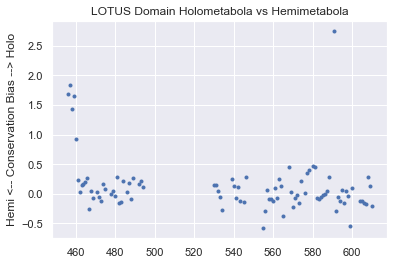

In [83]:
X = conservation_score[conservation_score['domain'] == "LOTUSVASA"].index.values
Y = conservation_score[conservation_score['domain'] == "LOTUSVASA"]['log_ratio'].values

fig = plt.figure()
plt.plot(X, Y, '.')
plt.title('LOTUS Domain Holometabola vs Hemimetabola')
plt.ylabel('Hemi <-- Conservation Bias --> Holo')

Text(0, 0.5, 'Hemi <-- Conservation Bias --> Holo')

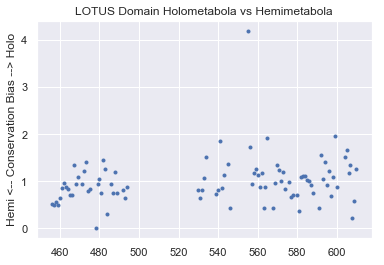

In [84]:
X = conservation_score[conservation_score['domain'] == "LOTUSVASA"].index.values
Y = conservation_score[conservation_score['domain'] == "LOTUSVASA"]['ratio_log'].values

fig = plt.figure()
plt.plot(X, Y, '.')
plt.title('LOTUS Domain Holometabola vs Hemimetabola')
plt.ylabel('Hemi <-- Conservation Bias --> Holo')

Text(0, 0.5, 'Hemi <-- Conservation Bias --> Holo')

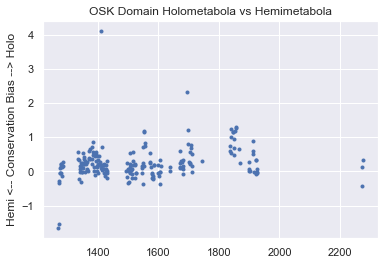

In [85]:
X = conservation_score[conservation_score['domain'] == "OSK"].index.values
Y = conservation_score[conservation_score['domain'] == "OSK"]['log_ratio'].values

fig = plt.figure()
plt.plot(X, Y, '.')
plt.title('OSK Domain Holometabola vs Hemimetabola')
plt.ylabel('Hemi <-- Conservation Bias --> Holo')

Text(0, 0.5, 'Hemi <-- Conservation Bias --> Holo')

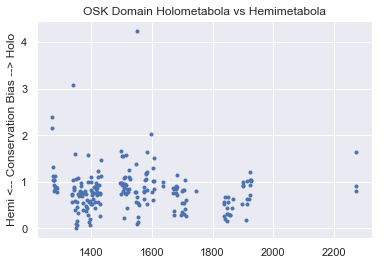

In [86]:
X = conservation_score[conservation_score['domain'] == "OSK"].index.values
Y = conservation_score[conservation_score['domain'] == "OSK"]['ratio_log'].values

fig = plt.figure()
plt.plot(X, Y, '.')
plt.title('OSK Domain Holometabola vs Hemimetabola')
plt.ylabel('Hemi <-- Conservation Bias --> Holo')

# Comparison of domains LOTUS VS OSK

In [87]:
import scipy.stats as stats

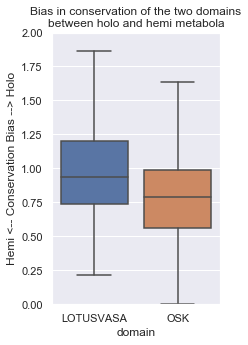

In [88]:
fig = plt.figure(figsize=(3,5))
sns.boxplot(data=conservation_score[conservation_score['domain'].isin(['LOTUSVASA', 'OSK'])], x='domain' , y='ratio_log', fliersize=0)
plt.ylim(0,2)
plt.ylabel('Hemi <-- Conservation Bias --> Holo')
plt.title("Bias in conservation of the two domains\nbetween holo and hemi metabola")
fig.savefig('../Figures/RAW/Fig4_boxplot.svg')

In [89]:
osk = conservation_score[(conservation_score['domain'] == 'OSK')]['ratio_log']
lotus = conservation_score[(conservation_score['domain'] == 'LOTUSVASA')]['ratio_log']

In [90]:
stats.mannwhitneyu(osk, lotus)

MannwhitneyuResult(statistic=6887.5, pvalue=5.4805415553452144e-05)

## Computing numbers

In [93]:
mapping = pd.read_csv("../Data/03_Oskar_scores_generation/CSV/mapping.csv")

In [119]:
conservation_score = conservation_score.merge(mapping[['structure', 'alignment', 'secondary']], how="left", on="alignment")

In [120]:
conservation_score[(conservation_score['secondary'] == 'Beta1') & (conservation_score['domain'] == 'LOTUSVASA')]["ratio_log"].mean()

1.0544579869571844

In [121]:
conservation_score[(conservation_score['secondary'] == 'Beta2') & (conservation_score['domain'] == 'LOTUSVASA')]["ratio_log"].mean()

1.0354428642331883

In [122]:
conservation_score[(conservation_score['secondary'] == 'Beta1') & (conservation_score['domain'] == 'LOTUSVASA')]

,hemi_elec,hemi_valdar,holo_elec,holo_valdar,domain,alignment,ratio,ratio_log,log_ratio,structure,secondary
571,0.000000,0.737690,0.000000,0.684482,LOTUSVASA,571,0.927872,1.246067,-0.074861,205.0,Beta1
572,0.343750,0.362632,0.108906,0.358068,LOTUSVASA,572,0.987414,1.012487,-0.012666,206.0,Beta1
573,0.062500,0.483519,0.041406,0.416865,LOTUSVASA,573,0.862150,1.204119,-0.148326,207.0,Beta1
574,0.109375,0.281470,-0.161875,0.350848,LOTUSVASA,574,1.246482,0.826205,0.220325,208.0,Beta1
576,0.515625,0.362492,0.340000,0.368645,LOTUSVASA,576,1.016975,0.983413,0.016832,209.0,Beta1


In [111]:
conservation_score[(conservation_score['secondary'] == 'Beta2') & (conservation_score['domain'] == 'LOTUSVASA')]

,hemi_elec,hemi_valdar,holo_elec,holo_valdar,domain,alignment,ratio,ratio_log,log_ratio,secondary
583,-0.156250,0.412513,0.243438,0.376457,LOTUSVASA,583,0.912593,1.103293,-0.091465,Beta2
584,0.000000,0.622448,0.027031,0.588268,LOTUSVASA,584,0.945088,1.119127,-0.056478,Beta2
585,0.000000,0.568799,0.000625,0.559221,LOTUSVASA,585,0.983161,1.030098,-0.016982,Beta2
586,0.109375,0.377478,0.158438,0.378367,LOTUSVASA,586,1.002354,0.997587,0.002351,Beta2
587,0.031250,0.489090,-0.030312,0.515264,LOTUSVASA,587,1.053515,0.927109,0.052132,Beta2


In [112]:
conservation_score[(conservation_score['domain'] == 'OSK')].groupby('secondary').mean()

,hemi_elec,hemi_valdar,holo_elec,holo_valdar,alignment,ratio,ratio_log,log_ratio
secondary,,,,,,,,
Alpha1,-0.072917,0.305958,-0.063099,0.333900,1279.500000,1.102917,0.932136,0.089807
Alpha2,-0.113281,0.584923,-0.129544,0.736965,1356.333333,1.286309,0.541620,0.240461
Alpha3,0.061080,0.473591,0.170213,0.580709,1401.545455,1.243523,0.720737,0.205282
Alpha4,-0.185268,0.687567,-0.096719,0.719840,1438.714286,1.061982,0.835358,0.049375
Alpha5,-0.041118,0.488200,-0.031974,0.519797,1508.000000,1.098974,0.957273,0.067929
Alpha6,0.028125,0.297482,0.022187,0.621793,1553.800000,2.391002,0.418587,0.809879
Alpha7,0.068257,0.468289,0.091390,0.476993,1589.684211,1.055577,1.057079,0.030204
Alpha8,0.047917,0.410493,0.152688,0.496902,1914.666667,1.263865,0.823419,0.191888
Beta1,0.040625,0.694060,0.038187,0.723943,1347.000000,1.048951,0.725831,0.026291


In [124]:
conservation_score[(conservation_score["domain"] == "OSK") & (conservation_score["structure"].isin([442, 436, 576]))]

,hemi_elec,hemi_valdar,holo_elec,holo_valdar,domain,alignment,ratio,ratio_log,log_ratio,structure,secondary
1358,-0.21875,0.350962,0.361719,0.477396,OSK,1358,1.360251,0.706164,0.307670,436.0,Alpha2
1370,0.25000,0.292838,0.294219,0.426722,OSK,1370,1.457193,0.693428,0.376512,442.0,NaN
1839,0.37500,0.255192,0.808125,0.690094,OSK,1839,2.704221,0.271594,0.994814,576.0,NaN


In [94]:
mapping[(mapping['secondary'] == 'Beta1') & (mapping['domain'] == 'LOTUSVASA')]['alignment']

267    571
268    572
269    573
270    574
271    576
Name: alignment, dtype: int64

In [91]:
osk.mean()

0.8200880445625233

In [92]:
lotus.mean()

1.0029910513538125

In [125]:
conservation_score[(conservation_score["domain"] == "LOTUSVASA") & (conservation_score["structure"].isin([197, 215]))]

,hemi_elec,hemi_valdar,holo_elec,holo_valdar,domain,alignment,ratio,ratio_log,log_ratio,structure,secondary
561,-0.06250,0.421173,-0.382344,0.468241,LOTUSVASA,561,1.111754,0.877487,0.105939,197.0,Alpha4
583,-0.15625,0.412513,0.243438,0.376457,LOTUSVASA,583,0.912593,1.103293,-0.091465,215.0,Beta2


In [126]:
OSK_surface = "GHTSGTYNdS---iNsDydaylLDfplm--rMELKCrfRRHERvLq-gl-vsgLt-nG-rnRlKrvQlPEGTq-ivnI-s--imrGKPlVQ-eHdfrlliKEmHNMRlVpiltnlaPLgNYCHDKVLCDKiYR-nKFirSECCHLKvId-hsC-inErGVvRfDcfQAspRQVTGSKEPylfwNkI-rqR-lqV-eTSLEY"

In [129]:
mapping[mapping['structure'] == 457]

,structure,domain,secondary,Dmel_Seq,alignment
58,457,OSK,NaN,S,1393


In [127]:
conservation_score

,hemi_elec,hemi_valdar,holo_elec,holo_valdar,domain,alignment,ratio,ratio_log,log_ratio,structure,secondary
0,0.0,0.0,0.000000,0.000016,NaN,0,1.0,0.0,0.0,NaN,NaN
1,0.0,0.0,0.002500,0.000016,NaN,1,1.0,0.0,0.0,NaN,NaN
2,0.0,0.0,0.000000,0.000016,NaN,2,1.0,0.0,0.0,NaN,NaN
3,0.0,0.0,0.000000,0.000016,NaN,3,1.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.000000,0.000016,NaN,4,1.0,0.0,0.0,NaN,NaN
5,0.0,0.0,0.000000,0.000016,NaN,5,1.0,0.0,0.0,NaN,NaN
6,0.0,0.0,0.000000,0.000016,NaN,6,1.0,0.0,0.0,NaN,NaN
7,0.0,0.0,0.000000,0.000016,NaN,7,1.0,0.0,0.0,NaN,NaN
8,0.0,0.0,0.000000,0.000016,NaN,8,1.0,0.0,0.0,NaN,NaN
9,0.0,0.0,-0.002500,0.000016,NaN,9,1.0,0.0,0.0,NaN,NaN


In [ ]:
!git push


Username for 'https://github.com': 